In [6]:
#!pip install gym_super_mario_bros==7.3.0 nes_py

  Using cached gym_super_mario_bros-7.3.0-py2.py3-none-any.whl (198 kB)
  Using cached nes_py-8.1.8.tar.gz (76 kB)
  Created wheel for nes-py: filename=nes_py-8.1.8-cp39-cp39-win_amd64.whl size=47376 sha256=3355566a34242b4340ad26f2c210efb43afe1f3b71766c260868fc820e43cc9b
  Stored in directory: c:\users\divij\appdata\local\pip\cache\wheels\5b\37\c1\b0eb34358d6e26fac73cbedd57b76d450e3150ab8b2ae16e5e
Successfully built nes-py


In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [4]:
# Wrapping simplifies AI learning the movements
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env,SIMPLE_MOVEMENT)

In [5]:
# Number of Movements
env.action_space

Discrete(7)

In [6]:
env.observation_space.shape

(240, 256, 3)

In [9]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env,SIMPLE_MOVEMENT)
env.reset()
for frame in range(5000):
    # A random action
    state,reward,done,info = env.step(env.action_space.sample())
    # Show the game
    env.render()
env.close()

In [19]:
#!pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu113/torchvision-0.11.2%2Bcu113-cp39-cp39-win_amd64.whl (3.2 MB)
  Using cached https://download.pytorch.org/whl/cu113/torchaudio-0.10.1%2Bcu113-cp39-cp39-win_amd64.whl (336 kB)


In [25]:
#!pip install stable-baselines3[extra]

Reason for being yanked: re-release with new wheels
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.



  Created wheel for atari-py: filename=atari_py-0.2.6-cp39-cp39-win_amd64.whl size=1155033 sha256=f34319ef2e9b5725205ea9014f45f3f2cd049182404b6cb171f3dc09f0d0b2e4
  Stored in directory: c:\users\divij\appdata\local\pip\cache\wheels\5b\1f\fb\f8135d758ce2cd876eefa28f4320702169566d28de4d2e8aa6
  Created wheel for gym: filename=gym-0.19.0-py3-none-any.whl size=1663114 sha256=3ad71b3f75391ae86e0434cc730e48900f74daa9818e793779a65949443c8535
  Stored in directory: c:\users\divij\appdata\local\pip\cache\wheels\46\9f\66\e5922382f4e2ecd0bad129510b758c65f0dbb197d5fc04df9a
Successfully built atari-py gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.0.0
    Uninstalling cloudpickle-2.0.0:
      Successfully uninstalled cloudpickle-2.0.0
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0


In [18]:
from gym.wrappers import FrameStack, GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
import matplotlib.pyplot as plt

In [19]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env,SIMPLE_MOVEMENT)

In [20]:
state = env.reset()
print(state.shape)

(240, 256, 3)


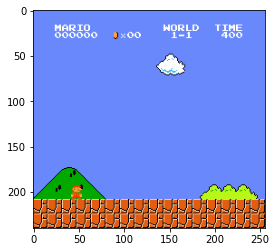

In [21]:
plt.imshow(state)

In [22]:
env = GrayScaleObservation(env,keep_dim=True)

(240, 256, 1)


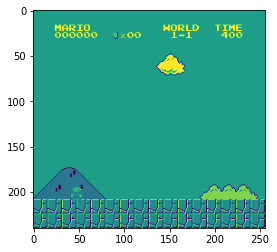

In [23]:
state = env.reset()
print(state.shape)
plt.imshow(state)

In [24]:
env = DummyVecEnv([lambda:env])

In [25]:
env = VecFrameStack(env,4,channels_order='last')

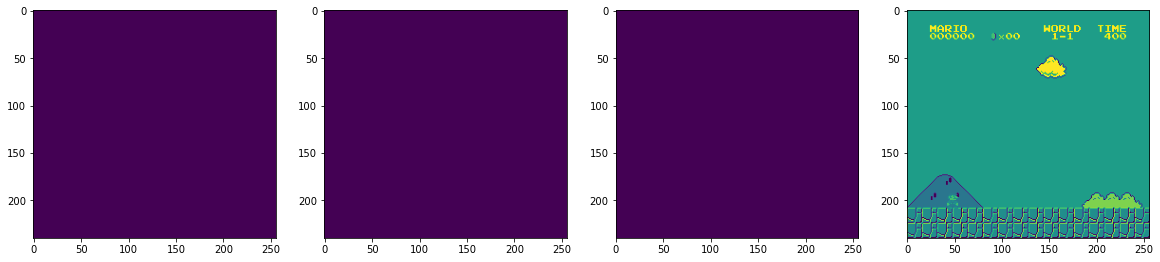

In [26]:
state = env.reset()
plt.figure(figsize=(20,20))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [27]:
import os
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [28]:
# Saving Model
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [29]:
CHECKPOINT_DIR = "./train/"
LOG_DIR = "./logs/"

In [30]:
callback = TrainAndLoggingCallback(check_freq=10000,save_path=CHECKPOINT_DIR)

In [31]:
model = PPO('CnnPolicy', env,verbose=1,tensorboard_log=LOG_DIR,learning_rate=0.000001,n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [22]:
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_3


C:\Users\divij\anaconda3\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 23  |
|    iterations      | 1   |
|    time_elapsed    | 21  |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 23           |
|    iterations           | 2            |
|    time_elapsed         | 42           |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 7.407856e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.000794    |
|    learning_rate        | 1e-06        |
|    loss                 | 177          |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000109    |
|    value_loss           | 466          |
------------------------------------------
-----------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 15            |
|    iterations           | 13            |
|    time_elapsed         | 421           |
|    total_timesteps      | 6656          |
| train/                  |               |
|    approx_kl            | 9.0165995e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00542       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0652        |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000136     |
|    value_loss           | 0.157         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 16           |
|    iterations           | 14           |
|    time_elapsed         | 438     

------------------------------------------
| time/                   |              |
|    fps                  | 21           |
|    iterations           | 24           |
|    time_elapsed         | 581          |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 8.879229e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.000958     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.143        |
|    n_updates            | 230          |
|    policy_gradient_loss | -7.49e-05    |
|    value_loss           | 0.342        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 25            |
|    time_elapsed         | 594           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 24            |
|    iterations           | 35            |
|    time_elapsed         | 725           |
|    total_timesteps      | 17920         |
| train/                  |               |
|    approx_kl            | 1.2140023e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | -0.105        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.774         |
|    n_updates            | 340           |
|    policy_gradient_loss | 0.00029       |
|    value_loss           | 2.29          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 24            |
|    iterations           | 36            |
|    time_elapsed         | 737 

-------------------------------------------
| time/                   |               |
|    fps                  | 27            |
|    iterations           | 46            |
|    time_elapsed         | 871           |
|    total_timesteps      | 23552         |
| train/                  |               |
|    approx_kl            | 1.3274839e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | -0.00793      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.075         |
|    n_updates            | 450           |
|    policy_gradient_loss | -0.000157     |
|    value_loss           | 0.135         |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 27             |
|    iterations           | 47             |
|    time_elapsed         | 

-------------------------------------------
| time/                   |               |
|    fps                  | 28            |
|    iterations           | 57            |
|    time_elapsed         | 1006          |
|    total_timesteps      | 29184         |
| train/                  |               |
|    approx_kl            | 1.5507685e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.338         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0611        |
|    n_updates            | 560           |
|    policy_gradient_loss | -7.16e-05     |
|    value_loss           | 0.289         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 29            |
|    iterations           | 58            |
|    time_elapsed         | 1018

------------------------------------------
| time/                   |              |
|    fps                  | 30           |
|    iterations           | 68           |
|    time_elapsed         | 1145         |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 1.374702e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.93        |
|    explained_variance   | 0.0825       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.134        |
|    n_updates            | 670          |
|    policy_gradient_loss | 0.000328     |
|    value_loss           | 0.63         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 30            |
|    iterations           | 69            |
|    time_elapsed         | 1157          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 31            |
|    iterations           | 79            |
|    time_elapsed         | 1282          |
|    total_timesteps      | 40448         |
| train/                  |               |
|    approx_kl            | 2.4611829e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.92         |
|    explained_variance   | -0.00831      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0995        |
|    n_updates            | 780           |
|    policy_gradient_loss | -0.000291     |
|    value_loss           | 0.175         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 31           |
|    iterations           | 80           |
|    time_elapsed         | 1294    

-------------------------------------------
| time/                   |               |
|    fps                  | 32            |
|    iterations           | 90            |
|    time_elapsed         | 1417          |
|    total_timesteps      | 46080         |
| train/                  |               |
|    approx_kl            | 0.00012418663 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.91         |
|    explained_variance   | -0.0063       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0807        |
|    n_updates            | 890           |
|    policy_gradient_loss | -0.000744     |
|    value_loss           | 0.164         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 32          |
|    iterations           | 91          |
|    time_elapsed         | 1429        

-------------------------------------------
| time/                   |               |
|    fps                  | 33            |
|    iterations           | 101           |
|    time_elapsed         | 1554          |
|    total_timesteps      | 51712         |
| train/                  |               |
|    approx_kl            | 4.4095563e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | 0.00175       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0732        |
|    n_updates            | 1000          |
|    policy_gradient_loss | 0.00043       |
|    value_loss           | 0.578         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 33            |
|    iterations           | 102           |
|    time_elapsed         | 1566

------------------------------------------
| time/                   |              |
|    fps                  | 33           |
|    iterations           | 112          |
|    time_elapsed         | 1688         |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0018926325 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | 0.103        |
|    learning_rate        | 1e-06        |
|    loss                 | 214          |
|    n_updates            | 1110         |
|    policy_gradient_loss | -2.56e-06    |
|    value_loss           | 461          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 34           |
|    iterations           | 113          |
|    time_elapsed         | 1700         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 34            |
|    iterations           | 123           |
|    time_elapsed         | 1825          |
|    total_timesteps      | 62976         |
| train/                  |               |
|    approx_kl            | 1.8605031e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | 0.0436        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0646        |
|    n_updates            | 1220          |
|    policy_gradient_loss | 6.01e-05      |
|    value_loss           | 0.183         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 34           |
|    iterations           | 124          |
|    time_elapsed         | 1837    

-------------------------------------------
| time/                   |               |
|    fps                  | 35            |
|    iterations           | 134           |
|    time_elapsed         | 1959          |
|    total_timesteps      | 68608         |
| train/                  |               |
|    approx_kl            | 0.00014025322 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | 0.00955       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.106         |
|    n_updates            | 1330          |
|    policy_gradient_loss | -0.00063      |
|    value_loss           | 0.416         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 35            |
|    iterations           | 135           |
|    time_elapsed         | 1971

------------------------------------------
| time/                   |              |
|    fps                  | 35           |
|    iterations           | 145          |
|    time_elapsed         | 2093         |
|    total_timesteps      | 74240        |
| train/                  |              |
|    approx_kl            | 6.433192e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.83        |
|    explained_variance   | 0.217        |
|    learning_rate        | 1e-06        |
|    loss                 | 18.2         |
|    n_updates            | 1440         |
|    policy_gradient_loss | -0.000557    |
|    value_loss           | 11.3         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 35           |
|    iterations           | 146          |
|    time_elapsed         | 2105         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 35           |
|    iterations           | 156          |
|    time_elapsed         | 2225         |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 6.497523e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | 0.00449      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0592       |
|    n_updates            | 1550         |
|    policy_gradient_loss | -0.000189    |
|    value_loss           | 0.273        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 35           |
|    iterations           | 157          |
|    time_elapsed         | 2240         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 167           |
|    time_elapsed         | 2360          |
|    total_timesteps      | 85504         |
| train/                  |               |
|    approx_kl            | 0.00017920253 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.85         |
|    explained_variance   | -0.000133     |
|    learning_rate        | 1e-06         |
|    loss                 | 0.144         |
|    n_updates            | 1660          |
|    policy_gradient_loss | -0.000681     |
|    value_loss           | 0.275         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 168           |
|    time_elapsed         | 2372

-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 178           |
|    time_elapsed         | 2495          |
|    total_timesteps      | 91136         |
| train/                  |               |
|    approx_kl            | 9.8757795e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.78         |
|    explained_variance   | 0.0313        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0751        |
|    n_updates            | 1770          |
|    policy_gradient_loss | 0.000341      |
|    value_loss           | 0.582         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 179           |
|    time_elapsed         | 2506

-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 189           |
|    time_elapsed         | 2626          |
|    total_timesteps      | 96768         |
| train/                  |               |
|    approx_kl            | 9.0724556e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | 0.000437      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0318        |
|    n_updates            | 1880          |
|    policy_gradient_loss | -0.000623     |
|    value_loss           | 0.11          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 36            |
|    iterations           | 190           |
|    time_elapsed         | 2638

-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 200           |
|    time_elapsed         | 2761          |
|    total_timesteps      | 102400        |
| train/                  |               |
|    approx_kl            | 0.00012868212 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.81         |
|    explained_variance   | 0.0124        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0427        |
|    n_updates            | 1990          |
|    policy_gradient_loss | -0.000358     |
|    value_loss           | 0.22          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 201           |
|    time_elapsed         | 2773

-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 211           |
|    time_elapsed         | 2892          |
|    total_timesteps      | 108032        |
| train/                  |               |
|    approx_kl            | 0.00014159677 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.79         |
|    explained_variance   | -0.0242       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.154         |
|    n_updates            | 2100          |
|    policy_gradient_loss | -0.000318     |
|    value_loss           | 0.478         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 212          |
|    time_elapsed         | 2904    

-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 222           |
|    time_elapsed         | 3027          |
|    total_timesteps      | 113664        |
| train/                  |               |
|    approx_kl            | 0.00014869694 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.81         |
|    explained_variance   | -0.0246       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0541        |
|    n_updates            | 2210          |
|    policy_gradient_loss | -0.000727     |
|    value_loss           | 0.124         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 223          |
|    time_elapsed         | 3039    

------------------------------------------
| time/                   |              |
|    fps                  | 37           |
|    iterations           | 233          |
|    time_elapsed         | 3160         |
|    total_timesteps      | 119296       |
| train/                  |              |
|    approx_kl            | 4.142383e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.79        |
|    explained_variance   | 0.00105      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0806       |
|    n_updates            | 2320         |
|    policy_gradient_loss | -0.000256    |
|    value_loss           | 0.154        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 234           |
|    time_elapsed         | 3171          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 244           |
|    time_elapsed         | 3294          |
|    total_timesteps      | 124928        |
| train/                  |               |
|    approx_kl            | 5.4498785e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.79         |
|    explained_variance   | -0.0429       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.068         |
|    n_updates            | 2430          |
|    policy_gradient_loss | -0.00026      |
|    value_loss           | 0.198         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 37            |
|    iterations           | 245           |
|    time_elapsed         | 3306

------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 255          |
|    time_elapsed         | 3429         |
|    total_timesteps      | 130560       |
| train/                  |              |
|    approx_kl            | 0.0029372987 |
|    clip_fraction        | 0.00371      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.76        |
|    explained_variance   | 0.359        |
|    learning_rate        | 1e-06        |
|    loss                 | 111          |
|    n_updates            | 2540         |
|    policy_gradient_loss | 0.000518     |
|    value_loss           | 271          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 256           |
|    time_elapsed         | 3441          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 266          |
|    time_elapsed         | 3560         |
|    total_timesteps      | 136192       |
| train/                  |              |
|    approx_kl            | 0.0003386446 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.75        |
|    explained_variance   | -0.0473      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0465       |
|    n_updates            | 2650         |
|    policy_gradient_loss | -0.00132     |
|    value_loss           | 0.116        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 267          |
|    time_elapsed         | 3572         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 277           |
|    time_elapsed         | 3694          |
|    total_timesteps      | 141824        |
| train/                  |               |
|    approx_kl            | 0.00011094834 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.72         |
|    explained_variance   | 0.0409        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0901        |
|    n_updates            | 2760          |
|    policy_gradient_loss | -0.00042      |
|    value_loss           | 0.354         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 278           |
|    time_elapsed         | 3706

-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 288           |
|    time_elapsed         | 3826          |
|    total_timesteps      | 147456        |
| train/                  |               |
|    approx_kl            | 0.00034688448 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.65         |
|    explained_variance   | -0.00479      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0756        |
|    n_updates            | 2870          |
|    policy_gradient_loss | -0.000722     |
|    value_loss           | 4.91          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 289           |
|    time_elapsed         | 3839

------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 299          |
|    time_elapsed         | 3962         |
|    total_timesteps      | 153088       |
| train/                  |              |
|    approx_kl            | 0.0004096136 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.71        |
|    explained_variance   | 0.00468      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0396       |
|    n_updates            | 2980         |
|    policy_gradient_loss | -0.00101     |
|    value_loss           | 0.117        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 300           |
|    time_elapsed         | 3974          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 310           |
|    time_elapsed         | 4094          |
|    total_timesteps      | 158720        |
| train/                  |               |
|    approx_kl            | 0.00022569962 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.63         |
|    explained_variance   | 0.0391        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.19          |
|    n_updates            | 3090          |
|    policy_gradient_loss | -0.00105      |
|    value_loss           | 0.511         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 311           |
|    time_elapsed         | 4107

-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 321           |
|    time_elapsed         | 4229          |
|    total_timesteps      | 164352        |
| train/                  |               |
|    approx_kl            | 0.00018862262 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.59         |
|    explained_variance   | -0.00498      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0498        |
|    n_updates            | 3200          |
|    policy_gradient_loss | -0.000358     |
|    value_loss           | 0.433         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 38           |
|    iterations           | 322          |
|    time_elapsed         | 4241    

-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 332           |
|    time_elapsed         | 4361          |
|    total_timesteps      | 169984        |
| train/                  |               |
|    approx_kl            | 0.00012416171 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.66         |
|    explained_variance   | -0.00743      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0463        |
|    n_updates            | 3310          |
|    policy_gradient_loss | -0.000388     |
|    value_loss           | 0.0969        |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 38            |
|    iterations           | 333           |
|    time_elapsed         | 4375

-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 343           |
|    time_elapsed         | 4495          |
|    total_timesteps      | 175616        |
| train/                  |               |
|    approx_kl            | 0.00048764294 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.67         |
|    explained_variance   | -0.0352       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0407        |
|    n_updates            | 3420          |
|    policy_gradient_loss | -0.00151      |
|    value_loss           | 0.287         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 344           |
|    time_elapsed         | 4507

------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 354          |
|    time_elapsed         | 4629         |
|    total_timesteps      | 181248       |
| train/                  |              |
|    approx_kl            | 9.735953e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.66        |
|    explained_variance   | -0.019       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.151        |
|    n_updates            | 3530         |
|    policy_gradient_loss | -0.000351    |
|    value_loss           | 0.554        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 355           |
|    time_elapsed         | 4641          |
|    t

-----------------------------------------
| time/                   |             |
|    fps                  | 39          |
|    iterations           | 365         |
|    time_elapsed         | 4761        |
|    total_timesteps      | 186880      |
| train/                  |             |
|    approx_kl            | 0.004796208 |
|    clip_fraction        | 0.00449     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.6        |
|    explained_variance   | 0.643       |
|    learning_rate        | 1e-06       |
|    loss                 | 132         |
|    n_updates            | 3640        |
|    policy_gradient_loss | -2.31e-05   |
|    value_loss           | 421         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 366           |
|    time_elapsed         | 4773          |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 376           |
|    time_elapsed         | 4897          |
|    total_timesteps      | 192512        |
| train/                  |               |
|    approx_kl            | 0.00022289576 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.64         |
|    explained_variance   | 0.0244        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0392        |
|    n_updates            | 3750          |
|    policy_gradient_loss | -0.000597     |
|    value_loss           | 0.126         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 377           |
|    time_elapsed         | 4909

------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 387          |
|    time_elapsed         | 5028         |
|    total_timesteps      | 198144       |
| train/                  |              |
|    approx_kl            | 9.391841e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.6         |
|    explained_variance   | -0.0345      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0705       |
|    n_updates            | 3860         |
|    policy_gradient_loss | -0.000197    |
|    value_loss           | 0.249        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 388           |
|    time_elapsed         | 5040          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 398          |
|    time_elapsed         | 5163         |
|    total_timesteps      | 203776       |
| train/                  |              |
|    approx_kl            | 0.0004500281 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.54        |
|    explained_variance   | 0.0324       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.2          |
|    n_updates            | 3970         |
|    policy_gradient_loss | -0.0014      |
|    value_loss           | 2            |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 399           |
|    time_elapsed         | 5175          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 409          |
|    time_elapsed         | 5295         |
|    total_timesteps      | 209408       |
| train/                  |              |
|    approx_kl            | 0.0007044779 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.59        |
|    explained_variance   | -0.0941      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0475       |
|    n_updates            | 4080         |
|    policy_gradient_loss | -0.00188     |
|    value_loss           | 0.106        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 410          |
|    time_elapsed         | 5307         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 420           |
|    time_elapsed         | 5429          |
|    total_timesteps      | 215040        |
| train/                  |               |
|    approx_kl            | 0.00040960056 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.53         |
|    explained_variance   | 0.234         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.107         |
|    n_updates            | 4190          |
|    policy_gradient_loss | -0.00153      |
|    value_loss           | 0.413         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 421          |
|    time_elapsed         | 5441    

-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 431           |
|    time_elapsed         | 5564          |
|    total_timesteps      | 220672        |
| train/                  |               |
|    approx_kl            | 0.00020001538 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.52         |
|    explained_variance   | 0.0122        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.147         |
|    n_updates            | 4300          |
|    policy_gradient_loss | -0.000537     |
|    value_loss           | 1.26          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 432          |
|    time_elapsed         | 5576    

-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 442           |
|    time_elapsed         | 5696          |
|    total_timesteps      | 226304        |
| train/                  |               |
|    approx_kl            | 0.00020740705 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.56         |
|    explained_variance   | -0.0917       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0619        |
|    n_updates            | 4410          |
|    policy_gradient_loss | -0.000654     |
|    value_loss           | 0.104         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 443           |
|    time_elapsed         | 5708

--------------------------------------------
| time/                   |                |
|    fps                  | 39             |
|    iterations           | 453            |
|    time_elapsed         | 5831           |
|    total_timesteps      | 231936         |
| train/                  |                |
|    approx_kl            | 0.000104091596 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.5           |
|    explained_variance   | 0.712          |
|    learning_rate        | 1e-06          |
|    loss                 | 38.3           |
|    n_updates            | 4520           |
|    policy_gradient_loss | 0.000479       |
|    value_loss           | 96.7           |
--------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 454          |
|    time_elapsed 

-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 464           |
|    time_elapsed         | 5963          |
|    total_timesteps      | 237568        |
| train/                  |               |
|    approx_kl            | 0.00022131985 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.49         |
|    explained_variance   | -0.00117      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.126         |
|    n_updates            | 4630          |
|    policy_gradient_loss | -0.000258     |
|    value_loss           | 0.254         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 465           |
|    time_elapsed         | 5975

-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 475           |
|    time_elapsed         | 6097          |
|    total_timesteps      | 243200        |
| train/                  |               |
|    approx_kl            | 2.1408312e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.46         |
|    explained_variance   | -0.137        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0575        |
|    n_updates            | 4740          |
|    policy_gradient_loss | -0.000118     |
|    value_loss           | 0.135         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 476           |
|    time_elapsed         | 6109

-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 486           |
|    time_elapsed         | 6231          |
|    total_timesteps      | 248832        |
| train/                  |               |
|    approx_kl            | 0.00039229507 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.38         |
|    explained_variance   | 0.0869        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.44          |
|    n_updates            | 4850          |
|    policy_gradient_loss | 0.00117       |
|    value_loss           | 5.56          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 39           |
|    iterations           | 487          |
|    time_elapsed         | 6243    

-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 497           |
|    time_elapsed         | 6366          |
|    total_timesteps      | 254464        |
| train/                  |               |
|    approx_kl            | 0.00017930649 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.47         |
|    explained_variance   | -0.14         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0533        |
|    n_updates            | 4960          |
|    policy_gradient_loss | -0.000354     |
|    value_loss           | 0.127         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 39            |
|    iterations           | 498           |
|    time_elapsed         | 6378

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 508          |
|    time_elapsed         | 6501         |
|    total_timesteps      | 260096       |
| train/                  |              |
|    approx_kl            | 9.561074e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.47        |
|    explained_variance   | -0.201       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0683       |
|    n_updates            | 5070         |
|    policy_gradient_loss | -0.0002      |
|    value_loss           | 0.384        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 509           |
|    time_elapsed         | 6513          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 519           |
|    time_elapsed         | 6632          |
|    total_timesteps      | 265728        |
| train/                  |               |
|    approx_kl            | 0.00030090904 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.39         |
|    explained_variance   | 0.154         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.15          |
|    n_updates            | 5180          |
|    policy_gradient_loss | -0.000267     |
|    value_loss           | 1.6           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 520          |
|    time_elapsed         | 6644    

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 530           |
|    time_elapsed         | 6767          |
|    total_timesteps      | 271360        |
| train/                  |               |
|    approx_kl            | 0.00044530176 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.43         |
|    explained_variance   | -0.184        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.052         |
|    n_updates            | 5290          |
|    policy_gradient_loss | -0.000868     |
|    value_loss           | 0.108         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 531          |
|    time_elapsed         | 6779    

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 541          |
|    time_elapsed         | 6899         |
|    total_timesteps      | 276992       |
| train/                  |              |
|    approx_kl            | 0.0014513899 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | 0.000199     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.144        |
|    n_updates            | 5400         |
|    policy_gradient_loss | -0.00232     |
|    value_loss           | 0.331        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 542           |
|    time_elapsed         | 6911          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 552          |
|    time_elapsed         | 7034         |
|    total_timesteps      | 282624       |
| train/                  |              |
|    approx_kl            | 0.0011233111 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.28        |
|    explained_variance   | -0.227       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0628       |
|    n_updates            | 5510         |
|    policy_gradient_loss | -0.00246     |
|    value_loss           | 0.306        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 553          |
|    time_elapsed         | 7046         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 563           |
|    time_elapsed         | 7165          |
|    total_timesteps      | 288256        |
| train/                  |               |
|    approx_kl            | 0.00023337232 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.29         |
|    explained_variance   | -0.292        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.103         |
|    n_updates            | 5620          |
|    policy_gradient_loss | -0.000551     |
|    value_loss           | 0.379         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 564          |
|    time_elapsed         | 7177    

-----------------------------------------
| time/                   |             |
|    fps                  | 40          |
|    iterations           | 574         |
|    time_elapsed         | 7300        |
|    total_timesteps      | 293888      |
| train/                  |             |
|    approx_kl            | 0.004878367 |
|    clip_fraction        | 0.0268      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.669      |
|    explained_variance   | 0.457       |
|    learning_rate        | 1e-06       |
|    loss                 | 167         |
|    n_updates            | 5730        |
|    policy_gradient_loss | -0.00348    |
|    value_loss           | 425         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 575           |
|    time_elapsed         | 7312          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 585          |
|    time_elapsed         | 7433         |
|    total_timesteps      | 299520       |
| train/                  |              |
|    approx_kl            | 8.520193e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.958       |
|    explained_variance   | 0.756        |
|    learning_rate        | 1e-06        |
|    loss                 | 77.1         |
|    n_updates            | 5840         |
|    policy_gradient_loss | -0.000366    |
|    value_loss           | 153          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 586          |
|    time_elapsed         | 7447         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 596          |
|    time_elapsed         | 7568         |
|    total_timesteps      | 305152       |
| train/                  |              |
|    approx_kl            | 0.0024042306 |
|    clip_fraction        | 0.018        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.413       |
|    explained_variance   | 0.752        |
|    learning_rate        | 1e-06        |
|    loss                 | 167          |
|    n_updates            | 5950         |
|    policy_gradient_loss | -0.00261     |
|    value_loss           | 430          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 597          |
|    time_elapsed         | 7579         |
|    total_

----------------------------------------
| time/                   |            |
|    fps                  | 40         |
|    iterations           | 607        |
|    time_elapsed         | 7703       |
|    total_timesteps      | 310784     |
| train/                  |            |
|    approx_kl            | 0.00169974 |
|    clip_fraction        | 0.00352    |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.4       |
|    explained_variance   | 0.817      |
|    learning_rate        | 1e-06      |
|    loss                 | 154        |
|    n_updates            | 6060       |
|    policy_gradient_loss | -0.000746  |
|    value_loss           | 500        |
----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 608          |
|    time_elapsed         | 7715         |
|    total_timesteps      | 311296       |
| tr

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 618           |
|    time_elapsed         | 7835          |
|    total_timesteps      | 316416        |
| train/                  |               |
|    approx_kl            | 3.9461418e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.283        |
|    explained_variance   | 0.111         |
|    learning_rate        | 1e-06         |
|    loss                 | 565           |
|    n_updates            | 6170          |
|    policy_gradient_loss | -0.000203     |
|    value_loss           | 772           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 619          |
|    time_elapsed         | 7847    

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 629          |
|    time_elapsed         | 7971         |
|    total_timesteps      | 322048       |
| train/                  |              |
|    approx_kl            | 5.813944e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.316       |
|    explained_variance   | 0.162        |
|    learning_rate        | 1e-06        |
|    loss                 | 431          |
|    n_updates            | 6280         |
|    policy_gradient_loss | -0.000122    |
|    value_loss           | 1.07e+03     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 630          |
|    time_elapsed         | 7982         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 640           |
|    time_elapsed         | 8102          |
|    total_timesteps      | 327680        |
| train/                  |               |
|    approx_kl            | 0.00021008367 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.315        |
|    explained_variance   | 0.414         |
|    learning_rate        | 1e-06         |
|    loss                 | 196           |
|    n_updates            | 6390          |
|    policy_gradient_loss | -0.000702     |
|    value_loss           | 428           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 641          |
|    time_elapsed         | 8115    

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 651          |
|    time_elapsed         | 8237         |
|    total_timesteps      | 333312       |
| train/                  |              |
|    approx_kl            | 0.0002096598 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.388       |
|    explained_variance   | 0.567        |
|    learning_rate        | 1e-06        |
|    loss                 | 179          |
|    n_updates            | 6500         |
|    policy_gradient_loss | -0.00015     |
|    value_loss           | 761          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 652          |
|    time_elapsed         | 8249         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 662           |
|    time_elapsed         | 8369          |
|    total_timesteps      | 338944        |
| train/                  |               |
|    approx_kl            | 0.00064880785 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.493        |
|    explained_variance   | 0.916         |
|    learning_rate        | 1e-06         |
|    loss                 | 74.4          |
|    n_updates            | 6610          |
|    policy_gradient_loss | 0.000203      |
|    value_loss           | 207           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 663          |
|    time_elapsed         | 8381    

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 673           |
|    time_elapsed         | 8504          |
|    total_timesteps      | 344576        |
| train/                  |               |
|    approx_kl            | 0.00044455775 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.52         |
|    explained_variance   | 0.927         |
|    learning_rate        | 1e-06         |
|    loss                 | 82.7          |
|    n_updates            | 6720          |
|    policy_gradient_loss | -0.000314     |
|    value_loss           | 192           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 674          |
|    time_elapsed         | 8516    

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 684           |
|    time_elapsed         | 8639          |
|    total_timesteps      | 350208        |
| train/                  |               |
|    approx_kl            | 2.8227689e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.272        |
|    explained_variance   | 0.377         |
|    learning_rate        | 1e-06         |
|    loss                 | 81.2          |
|    n_updates            | 6830          |
|    policy_gradient_loss | -0.000248     |
|    value_loss           | 538           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 685          |
|    time_elapsed         | 8651    

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 695           |
|    time_elapsed         | 8771          |
|    total_timesteps      | 355840        |
| train/                  |               |
|    approx_kl            | 0.00065814285 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.46         |
|    explained_variance   | 0.842         |
|    learning_rate        | 1e-06         |
|    loss                 | 121           |
|    n_updates            | 6940          |
|    policy_gradient_loss | -0.000664     |
|    value_loss           | 172           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 696          |
|    time_elapsed         | 8783    

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 706           |
|    time_elapsed         | 8905          |
|    total_timesteps      | 361472        |
| train/                  |               |
|    approx_kl            | 0.00012663007 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.246        |
|    explained_variance   | 0.306         |
|    learning_rate        | 1e-06         |
|    loss                 | 116           |
|    n_updates            | 7050          |
|    policy_gradient_loss | -0.000323     |
|    value_loss           | 261           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 707           |
|    time_elapsed         | 8918

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 717           |
|    time_elapsed         | 9038          |
|    total_timesteps      | 367104        |
| train/                  |               |
|    approx_kl            | 0.00014680286 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.238        |
|    explained_variance   | 0.303         |
|    learning_rate        | 1e-06         |
|    loss                 | 612           |
|    n_updates            | 7160          |
|    policy_gradient_loss | 0.000356      |
|    value_loss           | 782           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 718           |
|    time_elapsed         | 9050

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 728          |
|    time_elapsed         | 9178         |
|    total_timesteps      | 372736       |
| train/                  |              |
|    approx_kl            | 0.0011228793 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.276       |
|    explained_variance   | 0.742        |
|    learning_rate        | 1e-06        |
|    loss                 | 89           |
|    n_updates            | 7270         |
|    policy_gradient_loss | -0.00164     |
|    value_loss           | 227          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 729           |
|    time_elapsed         | 9190          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 739           |
|    time_elapsed         | 9313          |
|    total_timesteps      | 378368        |
| train/                  |               |
|    approx_kl            | 1.8014922e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.284        |
|    explained_variance   | 0.352         |
|    learning_rate        | 1e-06         |
|    loss                 | 149           |
|    n_updates            | 7380          |
|    policy_gradient_loss | 0.000152      |
|    value_loss           | 729           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 740          |
|    time_elapsed         | 9325    

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 750           |
|    time_elapsed         | 9448          |
|    total_timesteps      | 384000        |
| train/                  |               |
|    approx_kl            | 0.00031422754 |
|    clip_fraction        | 0.00215       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.189        |
|    explained_variance   | 0.574         |
|    learning_rate        | 1e-06         |
|    loss                 | 153           |
|    n_updates            | 7490          |
|    policy_gradient_loss | -0.0013       |
|    value_loss           | 398           |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 40             |
|    iterations           | 751            |
|    time_elapsed         | 

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 761          |
|    time_elapsed         | 9581         |
|    total_timesteps      | 389632       |
| train/                  |              |
|    approx_kl            | 0.0005813261 |
|    clip_fraction        | 0.000977     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.306       |
|    explained_variance   | 0.804        |
|    learning_rate        | 1e-06        |
|    loss                 | 198          |
|    n_updates            | 7600         |
|    policy_gradient_loss | 0.00015      |
|    value_loss           | 563          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 762           |
|    time_elapsed         | 9596          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 772          |
|    time_elapsed         | 9717         |
|    total_timesteps      | 395264       |
| train/                  |              |
|    approx_kl            | 0.0005642207 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.554       |
|    explained_variance   | 0.902        |
|    learning_rate        | 1e-06        |
|    loss                 | 33.3         |
|    n_updates            | 7710         |
|    policy_gradient_loss | 0.000424     |
|    value_loss           | 90.2         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 773          |
|    time_elapsed         | 9729         |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 783          |
|    time_elapsed         | 9853         |
|    total_timesteps      | 400896       |
| train/                  |              |
|    approx_kl            | 0.0008434744 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.379       |
|    explained_variance   | 0.937        |
|    learning_rate        | 1e-06        |
|    loss                 | 71.3         |
|    n_updates            | 7820         |
|    policy_gradient_loss | -0.00048     |
|    value_loss           | 129          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 784          |
|    time_elapsed         | 9865         |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 40          |
|    iterations           | 794         |
|    time_elapsed         | 9986        |
|    total_timesteps      | 406528      |
| train/                  |             |
|    approx_kl            | 0.000200785 |
|    clip_fraction        | 0.000586    |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.189      |
|    explained_variance   | 0.468       |
|    learning_rate        | 1e-06       |
|    loss                 | 235         |
|    n_updates            | 7930        |
|    policy_gradient_loss | -0.000388   |
|    value_loss           | 778         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 795           |
|    time_elapsed         | 9998          |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 805          |
|    time_elapsed         | 10122        |
|    total_timesteps      | 412160       |
| train/                  |              |
|    approx_kl            | 5.899649e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.241       |
|    explained_variance   | 0.746        |
|    learning_rate        | 1e-06        |
|    loss                 | 184          |
|    n_updates            | 8040         |
|    policy_gradient_loss | 6.17e-06     |
|    value_loss           | 493          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 806          |
|    time_elapsed         | 10134        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 816          |
|    time_elapsed         | 10255        |
|    total_timesteps      | 417792       |
| train/                  |              |
|    approx_kl            | 0.0003410041 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.27        |
|    explained_variance   | 0.65         |
|    learning_rate        | 1e-06        |
|    loss                 | 193          |
|    n_updates            | 8150         |
|    policy_gradient_loss | -0.00031     |
|    value_loss           | 452          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 817           |
|    time_elapsed         | 10267         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 827           |
|    time_elapsed         | 10390         |
|    total_timesteps      | 423424        |
| train/                  |               |
|    approx_kl            | 0.00074969814 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.223        |
|    explained_variance   | 0.775         |
|    learning_rate        | 1e-06         |
|    loss                 | 82.7          |
|    n_updates            | 8260          |
|    policy_gradient_loss | -0.00095      |
|    value_loss           | 180           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 828          |
|    time_elapsed         | 10402   

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 838           |
|    time_elapsed         | 10523         |
|    total_timesteps      | 429056        |
| train/                  |               |
|    approx_kl            | 3.4243567e-05 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.195        |
|    explained_variance   | 0.563         |
|    learning_rate        | 1e-06         |
|    loss                 | 155           |
|    n_updates            | 8370          |
|    policy_gradient_loss | 0.000279      |
|    value_loss           | 271           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 839           |
|    time_elapsed         | 1053

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 849          |
|    time_elapsed         | 10660        |
|    total_timesteps      | 434688       |
| train/                  |              |
|    approx_kl            | 8.423312e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.181       |
|    explained_variance   | 0.279        |
|    learning_rate        | 1e-06        |
|    loss                 | 156          |
|    n_updates            | 8480         |
|    policy_gradient_loss | -0.000251    |
|    value_loss           | 672          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 850          |
|    time_elapsed         | 10672        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 860          |
|    time_elapsed         | 10796        |
|    total_timesteps      | 440320       |
| train/                  |              |
|    approx_kl            | 0.0005128159 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.274       |
|    explained_variance   | 0.851        |
|    learning_rate        | 1e-06        |
|    loss                 | 214          |
|    n_updates            | 8590         |
|    policy_gradient_loss | -0.000588    |
|    value_loss           | 335          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 861           |
|    time_elapsed         | 10808         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 871          |
|    time_elapsed         | 10929        |
|    total_timesteps      | 445952       |
| train/                  |              |
|    approx_kl            | 0.0011380487 |
|    clip_fraction        | 0.00625      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.301       |
|    explained_variance   | 0.888        |
|    learning_rate        | 1e-06        |
|    loss                 | 70.8         |
|    n_updates            | 8700         |
|    policy_gradient_loss | -0.000386    |
|    value_loss           | 188          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 872          |
|    time_elapsed         | 10941        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 882           |
|    time_elapsed         | 11064         |
|    total_timesteps      | 451584        |
| train/                  |               |
|    approx_kl            | 0.00010272476 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.148        |
|    explained_variance   | 0.366         |
|    learning_rate        | 1e-06         |
|    loss                 | 160           |
|    n_updates            | 8810          |
|    policy_gradient_loss | 5.32e-05      |
|    value_loss           | 391           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 883           |
|    time_elapsed         | 1107

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 893           |
|    time_elapsed         | 11196         |
|    total_timesteps      | 457216        |
| train/                  |               |
|    approx_kl            | 6.3270214e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.109        |
|    explained_variance   | 0.379         |
|    learning_rate        | 1e-06         |
|    loss                 | 746           |
|    n_updates            | 8920          |
|    policy_gradient_loss | -0.000149     |
|    value_loss           | 594           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 894          |
|    time_elapsed         | 11209   

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 904           |
|    time_elapsed         | 11332         |
|    total_timesteps      | 462848        |
| train/                  |               |
|    approx_kl            | 0.00018453295 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.134        |
|    explained_variance   | 0.66          |
|    learning_rate        | 1e-06         |
|    loss                 | 92.9          |
|    n_updates            | 9030          |
|    policy_gradient_loss | -0.000125     |
|    value_loss           | 230           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 40          |
|    iterations           | 905         |
|    time_elapsed         | 11345       

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 915           |
|    time_elapsed         | 11465         |
|    total_timesteps      | 468480        |
| train/                  |               |
|    approx_kl            | 0.00020694837 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.263        |
|    explained_variance   | 0.676         |
|    learning_rate        | 1e-06         |
|    loss                 | 397           |
|    n_updates            | 9140          |
|    policy_gradient_loss | -0.000177     |
|    value_loss           | 690           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 916           |
|    time_elapsed         | 1147

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 926           |
|    time_elapsed         | 11601         |
|    total_timesteps      | 474112        |
| train/                  |               |
|    approx_kl            | 0.00035918865 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.395        |
|    explained_variance   | 0.826         |
|    learning_rate        | 1e-06         |
|    loss                 | 120           |
|    n_updates            | 9250          |
|    policy_gradient_loss | -0.000639     |
|    value_loss           | 428           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 927          |
|    time_elapsed         | 11613   

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 937          |
|    time_elapsed         | 11734        |
|    total_timesteps      | 479744       |
| train/                  |              |
|    approx_kl            | 0.0008194817 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.346       |
|    explained_variance   | 0.894        |
|    learning_rate        | 1e-06        |
|    loss                 | 138          |
|    n_updates            | 9360         |
|    policy_gradient_loss | -0.000929    |
|    value_loss           | 286          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 938          |
|    time_elapsed         | 11748        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 948           |
|    time_elapsed         | 11870         |
|    total_timesteps      | 485376        |
| train/                  |               |
|    approx_kl            | 0.00056744146 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.392        |
|    explained_variance   | 0.741         |
|    learning_rate        | 1e-06         |
|    loss                 | 162           |
|    n_updates            | 9470          |
|    policy_gradient_loss | 0.000633      |
|    value_loss           | 372           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 949          |
|    time_elapsed         | 11882   

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 959          |
|    time_elapsed         | 12005        |
|    total_timesteps      | 491008       |
| train/                  |              |
|    approx_kl            | 0.0032362752 |
|    clip_fraction        | 0.00645      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.481       |
|    explained_variance   | 0.744        |
|    learning_rate        | 1e-06        |
|    loss                 | 147          |
|    n_updates            | 9580         |
|    policy_gradient_loss | 0.000125     |
|    value_loss           | 249          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 40          |
|    iterations           | 960         |
|    time_elapsed         | 12017       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 970           |
|    time_elapsed         | 12139         |
|    total_timesteps      | 496640        |
| train/                  |               |
|    approx_kl            | 0.00026408723 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.378        |
|    explained_variance   | 0.319         |
|    learning_rate        | 1e-06         |
|    loss                 | 598           |
|    n_updates            | 9690          |
|    policy_gradient_loss | 6.47e-05      |
|    value_loss           | 1.15e+03      |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 971           |
|    time_elapsed         | 1215

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 981          |
|    time_elapsed         | 12275        |
|    total_timesteps      | 502272       |
| train/                  |              |
|    approx_kl            | 0.0021305783 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.311       |
|    explained_variance   | 0.762        |
|    learning_rate        | 1e-06        |
|    loss                 | 110          |
|    n_updates            | 9800         |
|    policy_gradient_loss | -4.06e-05    |
|    value_loss           | 290          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 982          |
|    time_elapsed         | 12288        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 992           |
|    time_elapsed         | 12408         |
|    total_timesteps      | 507904        |
| train/                  |               |
|    approx_kl            | 0.00023871672 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.3          |
|    explained_variance   | 0.854         |
|    learning_rate        | 1e-06         |
|    loss                 | 82.6          |
|    n_updates            | 9910          |
|    policy_gradient_loss | 0.000354      |
|    value_loss           | 250           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 993          |
|    time_elapsed         | 12420   

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 1003         |
|    time_elapsed         | 12544        |
|    total_timesteps      | 513536       |
| train/                  |              |
|    approx_kl            | 0.0010675199 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.221       |
|    explained_variance   | 0.927        |
|    learning_rate        | 1e-06        |
|    loss                 | 87.8         |
|    n_updates            | 10020        |
|    policy_gradient_loss | -0.000651    |
|    value_loss           | 180          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 1004          |
|    time_elapsed         | 12556         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 1014         |
|    time_elapsed         | 12677        |
|    total_timesteps      | 519168       |
| train/                  |              |
|    approx_kl            | 0.0023658737 |
|    clip_fraction        | 0.0246       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.25        |
|    explained_variance   | 0.772        |
|    learning_rate        | 1e-06        |
|    loss                 | 138          |
|    n_updates            | 10130        |
|    policy_gradient_loss | -0.00276     |
|    value_loss           | 318          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 1015         |
|    time_elapsed         | 12689        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 1025         |
|    time_elapsed         | 12812        |
|    total_timesteps      | 524800       |
| train/                  |              |
|    approx_kl            | 0.0004468487 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.168       |
|    explained_variance   | 0.778        |
|    learning_rate        | 1e-06        |
|    loss                 | 95.1         |
|    n_updates            | 10240        |
|    policy_gradient_loss | -0.000166    |
|    value_loss           | 254          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 1026         |
|    time_elapsed         | 12824        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 1036          |
|    time_elapsed         | 12948         |
|    total_timesteps      | 530432        |
| train/                  |               |
|    approx_kl            | 0.00016376493 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.335        |
|    explained_variance   | 0.142         |
|    learning_rate        | 1e-06         |
|    loss                 | 562           |
|    n_updates            | 10350         |
|    policy_gradient_loss | 0.000103      |
|    value_loss           | 1.32e+03      |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 1037         |
|    time_elapsed         | 12960   

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 1047          |
|    time_elapsed         | 13082         |
|    total_timesteps      | 536064        |
| train/                  |               |
|    approx_kl            | 0.00046566443 |
|    clip_fraction        | 0.000391      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.315        |
|    explained_variance   | 0.386         |
|    learning_rate        | 1e-06         |
|    loss                 | 529           |
|    n_updates            | 10460         |
|    policy_gradient_loss | -0.000306     |
|    value_loss           | 893           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 1048          |
|    time_elapsed         | 1309

------------------------------------------
| time/                   |              |
|    fps                  | 40           |
|    iterations           | 1058         |
|    time_elapsed         | 13217        |
|    total_timesteps      | 541696       |
| train/                  |              |
|    approx_kl            | 0.0007835182 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.319       |
|    explained_variance   | 0.934        |
|    learning_rate        | 1e-06        |
|    loss                 | 42.7         |
|    n_updates            | 10570        |
|    policy_gradient_loss | -0.000527    |
|    value_loss           | 121          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 1059          |
|    time_elapsed         | 13229         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 1069          |
|    time_elapsed         | 13350         |
|    total_timesteps      | 547328        |
| train/                  |               |
|    approx_kl            | 0.00082990865 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.252        |
|    explained_variance   | 0.842         |
|    learning_rate        | 1e-06         |
|    loss                 | 118           |
|    n_updates            | 10680         |
|    policy_gradient_loss | -0.00108      |
|    value_loss           | 336           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 1070          |
|    time_elapsed         | 1336

-------------------------------------------
| time/                   |               |
|    fps                  | 40            |
|    iterations           | 1080          |
|    time_elapsed         | 13486         |
|    total_timesteps      | 552960        |
| train/                  |               |
|    approx_kl            | 8.3212624e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.219        |
|    explained_variance   | 0.771         |
|    learning_rate        | 1e-06         |
|    loss                 | 158           |
|    n_updates            | 10790         |
|    policy_gradient_loss | -4.82e-05     |
|    value_loss           | 547           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1081         |
|    time_elapsed         | 13498   

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1091         |
|    time_elapsed         | 13620        |
|    total_timesteps      | 558592       |
| train/                  |              |
|    approx_kl            | 0.0024585696 |
|    clip_fraction        | 0.0137       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.283       |
|    explained_variance   | 0.768        |
|    learning_rate        | 1e-06        |
|    loss                 | 244          |
|    n_updates            | 10900        |
|    policy_gradient_loss | -0.00252     |
|    value_loss           | 447          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1092         |
|    time_elapsed         | 13632        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1102        |
|    time_elapsed         | 13755       |
|    total_timesteps      | 564224      |
| train/                  |             |
|    approx_kl            | 0.000784492 |
|    clip_fraction        | 0.00625     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.35       |
|    explained_variance   | 0.67        |
|    learning_rate        | 1e-06       |
|    loss                 | 176         |
|    n_updates            | 11010       |
|    policy_gradient_loss | 0.00052     |
|    value_loss           | 301         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1103          |
|    time_elapsed         | 13767         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1113         |
|    time_elapsed         | 13888        |
|    total_timesteps      | 569856       |
| train/                  |              |
|    approx_kl            | 6.023096e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.261       |
|    explained_variance   | 0.458        |
|    learning_rate        | 1e-06        |
|    loss                 | 264          |
|    n_updates            | 11120        |
|    policy_gradient_loss | 4.19e-05     |
|    value_loss           | 768          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1114         |
|    time_elapsed         | 13903        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1124          |
|    time_elapsed         | 14024         |
|    total_timesteps      | 575488        |
| train/                  |               |
|    approx_kl            | 0.00018635974 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.235        |
|    explained_variance   | 0.639         |
|    learning_rate        | 1e-06         |
|    loss                 | 228           |
|    n_updates            | 11230         |
|    policy_gradient_loss | -0.000561     |
|    value_loss           | 559           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1125          |
|    time_elapsed         | 1403

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1135          |
|    time_elapsed         | 14160         |
|    total_timesteps      | 581120        |
| train/                  |               |
|    approx_kl            | 0.00050829735 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.264        |
|    explained_variance   | 0.742         |
|    learning_rate        | 1e-06         |
|    loss                 | 132           |
|    n_updates            | 11340         |
|    policy_gradient_loss | -0.000658     |
|    value_loss           | 270           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1136          |
|    time_elapsed         | 1417

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1146          |
|    time_elapsed         | 14292         |
|    total_timesteps      | 586752        |
| train/                  |               |
|    approx_kl            | 0.00048496074 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.241        |
|    explained_variance   | 0.717         |
|    learning_rate        | 1e-06         |
|    loss                 | 316           |
|    n_updates            | 11450         |
|    policy_gradient_loss | -0.000655     |
|    value_loss           | 725           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1147         |
|    time_elapsed         | 14305   

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1157          |
|    time_elapsed         | 14428         |
|    total_timesteps      | 592384        |
| train/                  |               |
|    approx_kl            | 0.00037892803 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.352        |
|    explained_variance   | 0.868         |
|    learning_rate        | 1e-06         |
|    loss                 | 41.9          |
|    n_updates            | 11560         |
|    policy_gradient_loss | -0.000448     |
|    value_loss           | 117           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1158         |
|    time_elapsed         | 14440   

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1168          |
|    time_elapsed         | 14561         |
|    total_timesteps      | 598016        |
| train/                  |               |
|    approx_kl            | 0.00058308896 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.266        |
|    explained_variance   | 0.755         |
|    learning_rate        | 1e-06         |
|    loss                 | 136           |
|    n_updates            | 11670         |
|    policy_gradient_loss | -0.000376     |
|    value_loss           | 311           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1169          |
|    time_elapsed         | 1457

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1179         |
|    time_elapsed         | 14698        |
|    total_timesteps      | 603648       |
| train/                  |              |
|    approx_kl            | 0.0002813998 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.308       |
|    explained_variance   | 0.256        |
|    learning_rate        | 1e-06        |
|    loss                 | 609          |
|    n_updates            | 11780        |
|    policy_gradient_loss | 0.000959     |
|    value_loss           | 1.08e+03     |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1180        |
|    time_elapsed         | 14710       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1190          |
|    time_elapsed         | 14830         |
|    total_timesteps      | 609280        |
| train/                  |               |
|    approx_kl            | 0.00018604414 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.39         |
|    explained_variance   | 0.494         |
|    learning_rate        | 1e-06         |
|    loss                 | 728           |
|    n_updates            | 11890         |
|    policy_gradient_loss | 0.000515      |
|    value_loss           | 1.22e+03      |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1191         |
|    time_elapsed         | 14843   

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1201         |
|    time_elapsed         | 14966        |
|    total_timesteps      | 614912       |
| train/                  |              |
|    approx_kl            | 0.0027387612 |
|    clip_fraction        | 0.016        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.321       |
|    explained_variance   | 0.382        |
|    learning_rate        | 1e-06        |
|    loss                 | 98.3         |
|    n_updates            | 12000        |
|    policy_gradient_loss | -0.00059     |
|    value_loss           | 286          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1202         |
|    time_elapsed         | 14978        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1212         |
|    time_elapsed         | 15102        |
|    total_timesteps      | 620544       |
| train/                  |              |
|    approx_kl            | 0.0018128904 |
|    clip_fraction        | 0.0139       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.261       |
|    explained_variance   | 0.793        |
|    learning_rate        | 1e-06        |
|    loss                 | 71.7         |
|    n_updates            | 12110        |
|    policy_gradient_loss | -0.000752    |
|    value_loss           | 198          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1213         |
|    time_elapsed         | 15114        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1223         |
|    time_elapsed         | 15235        |
|    total_timesteps      | 626176       |
| train/                  |              |
|    approx_kl            | 0.0010074067 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.331       |
|    explained_variance   | 0.739        |
|    learning_rate        | 1e-06        |
|    loss                 | 200          |
|    n_updates            | 12220        |
|    policy_gradient_loss | -0.000707    |
|    value_loss           | 498          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1224         |
|    time_elapsed         | 15247        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1234          |
|    time_elapsed         | 15370         |
|    total_timesteps      | 631808        |
| train/                  |               |
|    approx_kl            | 0.00026448723 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.215        |
|    explained_variance   | 0.779         |
|    learning_rate        | 1e-06         |
|    loss                 | 475           |
|    n_updates            | 12330         |
|    policy_gradient_loss | -0.00017      |
|    value_loss           | 666           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1235         |
|    time_elapsed         | 15382   

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1245         |
|    time_elapsed         | 15503        |
|    total_timesteps      | 637440       |
| train/                  |              |
|    approx_kl            | 9.209034e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.214       |
|    explained_variance   | 0.733        |
|    learning_rate        | 1e-06        |
|    loss                 | 194          |
|    n_updates            | 12440        |
|    policy_gradient_loss | 0.000675     |
|    value_loss           | 532          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1246          |
|    time_elapsed         | 15515         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1256         |
|    time_elapsed         | 15639        |
|    total_timesteps      | 643072       |
| train/                  |              |
|    approx_kl            | 0.0004633715 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.357       |
|    explained_variance   | 0.329        |
|    learning_rate        | 1e-06        |
|    loss                 | 287          |
|    n_updates            | 12550        |
|    policy_gradient_loss | -0.000305    |
|    value_loss           | 1.57e+03     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1257         |
|    time_elapsed         | 15651        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1267          |
|    time_elapsed         | 15772         |
|    total_timesteps      | 648704        |
| train/                  |               |
|    approx_kl            | 7.5543416e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.318        |
|    explained_variance   | 0.835         |
|    learning_rate        | 1e-06         |
|    loss                 | 96            |
|    n_updates            | 12660         |
|    policy_gradient_loss | -5.41e-05     |
|    value_loss           | 413           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1268         |
|    time_elapsed         | 15784   

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1278         |
|    time_elapsed         | 15907        |
|    total_timesteps      | 654336       |
| train/                  |              |
|    approx_kl            | 0.0046329824 |
|    clip_fraction        | 0.0279       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.31        |
|    explained_variance   | 0.566        |
|    learning_rate        | 1e-06        |
|    loss                 | 143          |
|    n_updates            | 12770        |
|    policy_gradient_loss | -0.00198     |
|    value_loss           | 294          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1279          |
|    time_elapsed         | 15919         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1289         |
|    time_elapsed         | 16040        |
|    total_timesteps      | 659968       |
| train/                  |              |
|    approx_kl            | 0.0011014194 |
|    clip_fraction        | 0.00664      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.317       |
|    explained_variance   | 0.8          |
|    learning_rate        | 1e-06        |
|    loss                 | 222          |
|    n_updates            | 12880        |
|    policy_gradient_loss | 0.000967     |
|    value_loss           | 490          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1290        |
|    time_elapsed         | 16055       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1300          |
|    time_elapsed         | 16176         |
|    total_timesteps      | 665600        |
| train/                  |               |
|    approx_kl            | 0.00015191792 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.27         |
|    explained_variance   | 0.549         |
|    learning_rate        | 1e-06         |
|    loss                 | 269           |
|    n_updates            | 12990         |
|    policy_gradient_loss | -0.000972     |
|    value_loss           | 608           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1301        |
|    time_elapsed         | 16188       

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1311          |
|    time_elapsed         | 16312         |
|    total_timesteps      | 671232        |
| train/                  |               |
|    approx_kl            | 0.00012408127 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.3          |
|    explained_variance   | 0.905         |
|    learning_rate        | 1e-06         |
|    loss                 | 125           |
|    n_updates            | 13100         |
|    policy_gradient_loss | -0.000252     |
|    value_loss           | 222           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1312          |
|    time_elapsed         | 1632

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1322         |
|    time_elapsed         | 16445        |
|    total_timesteps      | 676864       |
| train/                  |              |
|    approx_kl            | 0.0014312246 |
|    clip_fraction        | 0.00762      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.32        |
|    explained_variance   | 0.717        |
|    learning_rate        | 1e-06        |
|    loss                 | 272          |
|    n_updates            | 13210        |
|    policy_gradient_loss | -0.00212     |
|    value_loss           | 508          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1323         |
|    time_elapsed         | 16457        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1333         |
|    time_elapsed         | 16581        |
|    total_timesteps      | 682496       |
| train/                  |              |
|    approx_kl            | 0.0030092997 |
|    clip_fraction        | 0.0301       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.5         |
|    explained_variance   | 0.769        |
|    learning_rate        | 1e-06        |
|    loss                 | 384          |
|    n_updates            | 13320        |
|    policy_gradient_loss | -0.00309     |
|    value_loss           | 719          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1334         |
|    time_elapsed         | 16593        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1344          |
|    time_elapsed         | 16713         |
|    total_timesteps      | 688128        |
| train/                  |               |
|    approx_kl            | 0.00050008006 |
|    clip_fraction        | 0.00195       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.185        |
|    explained_variance   | 0.938         |
|    learning_rate        | 1e-06         |
|    loss                 | 75.2          |
|    n_updates            | 13430         |
|    policy_gradient_loss | -0.000407     |
|    value_loss           | 160           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1345        |
|    time_elapsed         | 16725       

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1355         |
|    time_elapsed         | 16848        |
|    total_timesteps      | 693760       |
| train/                  |              |
|    approx_kl            | 0.0010440695 |
|    clip_fraction        | 0.00488      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.192       |
|    explained_variance   | 0.753        |
|    learning_rate        | 1e-06        |
|    loss                 | 46.3         |
|    n_updates            | 13540        |
|    policy_gradient_loss | -0.00148     |
|    value_loss           | 95.1         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1356         |
|    time_elapsed         | 16861        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1366          |
|    time_elapsed         | 16981         |
|    total_timesteps      | 699392        |
| train/                  |               |
|    approx_kl            | 0.00034015044 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.247        |
|    explained_variance   | 0.863         |
|    learning_rate        | 1e-06         |
|    loss                 | 76.3          |
|    n_updates            | 13650         |
|    policy_gradient_loss | -0.000273     |
|    value_loss           | 174           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1367         |
|    time_elapsed         | 16993   

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1377         |
|    time_elapsed         | 17117        |
|    total_timesteps      | 705024       |
| train/                  |              |
|    approx_kl            | 0.0038588792 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.465       |
|    explained_variance   | 0.552        |
|    learning_rate        | 1e-06        |
|    loss                 | 29.9         |
|    n_updates            | 13760        |
|    policy_gradient_loss | -0.00105     |
|    value_loss           | 163          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1378         |
|    time_elapsed         | 17129        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1388          |
|    time_elapsed         | 17253         |
|    total_timesteps      | 710656        |
| train/                  |               |
|    approx_kl            | 0.00046553556 |
|    clip_fraction        | 0.00176       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.238        |
|    explained_variance   | 0.821         |
|    learning_rate        | 1e-06         |
|    loss                 | 82.4          |
|    n_updates            | 13870         |
|    policy_gradient_loss | 0.000574      |
|    value_loss           | 296           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1389         |
|    time_elapsed         | 17265   

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1399         |
|    time_elapsed         | 17385        |
|    total_timesteps      | 716288       |
| train/                  |              |
|    approx_kl            | 0.0012583267 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.262       |
|    explained_variance   | 0.835        |
|    learning_rate        | 1e-06        |
|    loss                 | 58           |
|    n_updates            | 13980        |
|    policy_gradient_loss | -0.000665    |
|    value_loss           | 150          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1400          |
|    time_elapsed         | 17397         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1410         |
|    time_elapsed         | 17521        |
|    total_timesteps      | 721920       |
| train/                  |              |
|    approx_kl            | 0.0016504957 |
|    clip_fraction        | 0.0102       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.267       |
|    explained_variance   | 0.847        |
|    learning_rate        | 1e-06        |
|    loss                 | 85           |
|    n_updates            | 14090        |
|    policy_gradient_loss | -0.000117    |
|    value_loss           | 193          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1411        |
|    time_elapsed         | 17533       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1421         |
|    time_elapsed         | 17654        |
|    total_timesteps      | 727552       |
| train/                  |              |
|    approx_kl            | 8.295488e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.201       |
|    explained_variance   | 0.679        |
|    learning_rate        | 1e-06        |
|    loss                 | 69.3         |
|    n_updates            | 14200        |
|    policy_gradient_loss | -0.000139    |
|    value_loss           | 696          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1422         |
|    time_elapsed         | 17666        |
|    total_

--------------------------------------------
| time/                   |                |
|    fps                  | 41             |
|    iterations           | 1432           |
|    time_elapsed         | 17789          |
|    total_timesteps      | 733184         |
| train/                  |                |
|    approx_kl            | 0.000119668664 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -0.18          |
|    explained_variance   | 0.813          |
|    learning_rate        | 1e-06          |
|    loss                 | 136            |
|    n_updates            | 14310          |
|    policy_gradient_loss | -0.000354      |
|    value_loss           | 276            |
--------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1433        |
|    time_elapsed     

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1443          |
|    time_elapsed         | 17921         |
|    total_timesteps      | 738816        |
| train/                  |               |
|    approx_kl            | 0.00037063356 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.166        |
|    explained_variance   | 0.82          |
|    learning_rate        | 1e-06         |
|    loss                 | 121           |
|    n_updates            | 14420         |
|    policy_gradient_loss | -0.000419     |
|    value_loss           | 287           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1444         |
|    time_elapsed         | 17933   

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1454         |
|    time_elapsed         | 18057        |
|    total_timesteps      | 744448       |
| train/                  |              |
|    approx_kl            | 0.0011874178 |
|    clip_fraction        | 0.0137       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.223       |
|    explained_variance   | 0.822        |
|    learning_rate        | 1e-06        |
|    loss                 | 59.1         |
|    n_updates            | 14530        |
|    policy_gradient_loss | -0.00215     |
|    value_loss           | 126          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1455         |
|    time_elapsed         | 18069        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1465          |
|    time_elapsed         | 18192         |
|    total_timesteps      | 750080        |
| train/                  |               |
|    approx_kl            | 0.00042034872 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.376        |
|    explained_variance   | 0.528         |
|    learning_rate        | 1e-06         |
|    loss                 | 170           |
|    n_updates            | 14640         |
|    policy_gradient_loss | -0.00191      |
|    value_loss           | 433           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1466          |
|    time_elapsed         | 1820

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1476         |
|    time_elapsed         | 18324        |
|    total_timesteps      | 755712       |
| train/                  |              |
|    approx_kl            | 0.0013852443 |
|    clip_fraction        | 0.0041       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.268       |
|    explained_variance   | 0.656        |
|    learning_rate        | 1e-06        |
|    loss                 | 67.6         |
|    n_updates            | 14750        |
|    policy_gradient_loss | -0.000877    |
|    value_loss           | 214          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1477          |
|    time_elapsed         | 18336         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1487         |
|    time_elapsed         | 18460        |
|    total_timesteps      | 761344       |
| train/                  |              |
|    approx_kl            | 0.0027872333 |
|    clip_fraction        | 0.0191       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.351       |
|    explained_variance   | 0.796        |
|    learning_rate        | 1e-06        |
|    loss                 | 71.7         |
|    n_updates            | 14860        |
|    policy_gradient_loss | -0.00346     |
|    value_loss           | 158          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1488         |
|    time_elapsed         | 18472        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1498          |
|    time_elapsed         | 18592         |
|    total_timesteps      | 766976        |
| train/                  |               |
|    approx_kl            | 0.00071073533 |
|    clip_fraction        | 0.00293       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.246        |
|    explained_variance   | 0.459         |
|    learning_rate        | 1e-06         |
|    loss                 | 522           |
|    n_updates            | 14970         |
|    policy_gradient_loss | -0.000982     |
|    value_loss           | 813           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1499          |
|    time_elapsed         | 1860

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1509         |
|    time_elapsed         | 18727        |
|    total_timesteps      | 772608       |
| train/                  |              |
|    approx_kl            | 9.358348e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.309       |
|    explained_variance   | 0.504        |
|    learning_rate        | 1e-06        |
|    loss                 | 144          |
|    n_updates            | 15080        |
|    policy_gradient_loss | 4.27e-05     |
|    value_loss           | 604          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1510         |
|    time_elapsed         | 18740        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1520         |
|    time_elapsed         | 18860        |
|    total_timesteps      | 778240       |
| train/                  |              |
|    approx_kl            | 0.0005335439 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.417       |
|    explained_variance   | 0.585        |
|    learning_rate        | 1e-06        |
|    loss                 | 174          |
|    n_updates            | 15190        |
|    policy_gradient_loss | -0.000379    |
|    value_loss           | 460          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1521          |
|    time_elapsed         | 18872         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1531         |
|    time_elapsed         | 18995        |
|    total_timesteps      | 783872       |
| train/                  |              |
|    approx_kl            | 0.0009938376 |
|    clip_fraction        | 0.0082       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.335       |
|    explained_variance   | 0.801        |
|    learning_rate        | 1e-06        |
|    loss                 | 66.5         |
|    n_updates            | 15300        |
|    policy_gradient_loss | -0.00141     |
|    value_loss           | 143          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1532          |
|    time_elapsed         | 19007         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1542         |
|    time_elapsed         | 19127        |
|    total_timesteps      | 789504       |
| train/                  |              |
|    approx_kl            | 4.244747e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.335       |
|    explained_variance   | 0.747        |
|    learning_rate        | 1e-06        |
|    loss                 | 78.6         |
|    n_updates            | 15410        |
|    policy_gradient_loss | 0.000433     |
|    value_loss           | 193          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1543          |
|    time_elapsed         | 19142         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1553         |
|    time_elapsed         | 19263        |
|    total_timesteps      | 795136       |
| train/                  |              |
|    approx_kl            | 0.0006937594 |
|    clip_fraction        | 0.00391      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.354       |
|    explained_variance   | 0.739        |
|    learning_rate        | 1e-06        |
|    loss                 | 91.2         |
|    n_updates            | 15520        |
|    policy_gradient_loss | 5.08e-05     |
|    value_loss           | 227          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1554         |
|    time_elapsed         | 19275        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1564         |
|    time_elapsed         | 19398        |
|    total_timesteps      | 800768       |
| train/                  |              |
|    approx_kl            | 0.0006128177 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.25        |
|    explained_variance   | 0.681        |
|    learning_rate        | 1e-06        |
|    loss                 | 104          |
|    n_updates            | 15630        |
|    policy_gradient_loss | -0.00146     |
|    value_loss           | 487          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1565         |
|    time_elapsed         | 19410        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1575          |
|    time_elapsed         | 19531         |
|    total_timesteps      | 806400        |
| train/                  |               |
|    approx_kl            | 4.9498398e-05 |
|    clip_fraction        | 0.000586      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.108        |
|    explained_variance   | 0.704         |
|    learning_rate        | 1e-06         |
|    loss                 | 149           |
|    n_updates            | 15740         |
|    policy_gradient_loss | -0.000588     |
|    value_loss           | 309           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1576        |
|    time_elapsed         | 19543       

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1586         |
|    time_elapsed         | 19666        |
|    total_timesteps      | 812032       |
| train/                  |              |
|    approx_kl            | 0.0003825724 |
|    clip_fraction        | 0.00117      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.4         |
|    explained_variance   | 0.642        |
|    learning_rate        | 1e-06        |
|    loss                 | 812          |
|    n_updates            | 15850        |
|    policy_gradient_loss | -0.000682    |
|    value_loss           | 1.15e+03     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1587         |
|    time_elapsed         | 19678        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1597         |
|    time_elapsed         | 19799        |
|    total_timesteps      | 817664       |
| train/                  |              |
|    approx_kl            | 0.0006318195 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.256       |
|    explained_variance   | 0.798        |
|    learning_rate        | 1e-06        |
|    loss                 | 116          |
|    n_updates            | 15960        |
|    policy_gradient_loss | -0.000334    |
|    value_loss           | 365          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1598          |
|    time_elapsed         | 19811         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1608          |
|    time_elapsed         | 19934         |
|    total_timesteps      | 823296        |
| train/                  |               |
|    approx_kl            | 0.00037656364 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.515        |
|    explained_variance   | 0.424         |
|    learning_rate        | 1e-06         |
|    loss                 | 304           |
|    n_updates            | 16070         |
|    policy_gradient_loss | 0.000548      |
|    value_loss           | 929           |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1609        |
|    time_elapsed         | 19946       

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1619         |
|    time_elapsed         | 20067        |
|    total_timesteps      | 828928       |
| train/                  |              |
|    approx_kl            | 0.0014316059 |
|    clip_fraction        | 0.0211       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.259       |
|    explained_variance   | 0.619        |
|    learning_rate        | 1e-06        |
|    loss                 | 442          |
|    n_updates            | 16180        |
|    policy_gradient_loss | -0.0019      |
|    value_loss           | 804          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1620          |
|    time_elapsed         | 20079         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1630         |
|    time_elapsed         | 20202        |
|    total_timesteps      | 834560       |
| train/                  |              |
|    approx_kl            | 0.0009202915 |
|    clip_fraction        | 0.00645      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.412       |
|    explained_variance   | 0.609        |
|    learning_rate        | 1e-06        |
|    loss                 | 368          |
|    n_updates            | 16290        |
|    policy_gradient_loss | -0.00034     |
|    value_loss           | 788          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1631         |
|    time_elapsed         | 20214        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1641         |
|    time_elapsed         | 20338        |
|    total_timesteps      | 840192       |
| train/                  |              |
|    approx_kl            | 0.0019172911 |
|    clip_fraction        | 0.00742      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.346       |
|    explained_variance   | 0.794        |
|    learning_rate        | 1e-06        |
|    loss                 | 72           |
|    n_updates            | 16400        |
|    policy_gradient_loss | -0.000432    |
|    value_loss           | 193          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1642        |
|    time_elapsed         | 20350       |
|    total_times

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1652          |
|    time_elapsed         | 20470         |
|    total_timesteps      | 845824        |
| train/                  |               |
|    approx_kl            | 0.00018079404 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.283        |
|    explained_variance   | 0.842         |
|    learning_rate        | 1e-06         |
|    loss                 | 63.5          |
|    n_updates            | 16510         |
|    policy_gradient_loss | -0.000284     |
|    value_loss           | 202           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1653          |
|    time_elapsed         | 2048

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1663         |
|    time_elapsed         | 20605        |
|    total_timesteps      | 851456       |
| train/                  |              |
|    approx_kl            | 0.0013522538 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.35        |
|    explained_variance   | 0.66         |
|    learning_rate        | 1e-06        |
|    loss                 | 120          |
|    n_updates            | 16620        |
|    policy_gradient_loss | -0.00197     |
|    value_loss           | 280          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1664          |
|    time_elapsed         | 20617         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1674         |
|    time_elapsed         | 20737        |
|    total_timesteps      | 857088       |
| train/                  |              |
|    approx_kl            | 0.0009214907 |
|    clip_fraction        | 0.00527      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.294       |
|    explained_variance   | 0.346        |
|    learning_rate        | 1e-06        |
|    loss                 | 451          |
|    n_updates            | 16730        |
|    policy_gradient_loss | -0.00166     |
|    value_loss           | 784          |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1675        |
|    time_elapsed         | 20749       |
|    total_times

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1685         |
|    time_elapsed         | 20872        |
|    total_timesteps      | 862720       |
| train/                  |              |
|    approx_kl            | 0.0017564442 |
|    clip_fraction        | 0.00937      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.427       |
|    explained_variance   | 0.851        |
|    learning_rate        | 1e-06        |
|    loss                 | 108          |
|    n_updates            | 16840        |
|    policy_gradient_loss | -0.00323     |
|    value_loss           | 223          |
------------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 41         |
|    iterations           | 1686       |
|    time_elapsed         | 20884      |
|    total_timesteps 

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1696         |
|    time_elapsed         | 21005        |
|    total_timesteps      | 868352       |
| train/                  |              |
|    approx_kl            | 0.0017321926 |
|    clip_fraction        | 0.00996      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.325       |
|    explained_variance   | 0.879        |
|    learning_rate        | 1e-06        |
|    loss                 | 148          |
|    n_updates            | 16950        |
|    policy_gradient_loss | -0.00187     |
|    value_loss           | 233          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1697         |
|    time_elapsed         | 21017        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1707          |
|    time_elapsed         | 21140         |
|    total_timesteps      | 873984        |
| train/                  |               |
|    approx_kl            | 0.00038462935 |
|    clip_fraction        | 0.00469       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.381        |
|    explained_variance   | 0.485         |
|    learning_rate        | 1e-06         |
|    loss                 | 219           |
|    n_updates            | 17060         |
|    policy_gradient_loss | -0.00165      |
|    value_loss           | 635           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1708          |
|    time_elapsed         | 2115

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1718         |
|    time_elapsed         | 21273        |
|    total_timesteps      | 879616       |
| train/                  |              |
|    approx_kl            | 0.0026768828 |
|    clip_fraction        | 0.017        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.395       |
|    explained_variance   | 0.927        |
|    learning_rate        | 1e-06        |
|    loss                 | 129          |
|    n_updates            | 17170        |
|    policy_gradient_loss | -0.00412     |
|    value_loss           | 225          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1719         |
|    time_elapsed         | 21288        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1729         |
|    time_elapsed         | 21408        |
|    total_timesteps      | 885248       |
| train/                  |              |
|    approx_kl            | 0.0011583442 |
|    clip_fraction        | 0.00781      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.243       |
|    explained_variance   | 0.382        |
|    learning_rate        | 1e-06        |
|    loss                 | 581          |
|    n_updates            | 17280        |
|    policy_gradient_loss | -0.00146     |
|    value_loss           | 665          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1730         |
|    time_elapsed         | 21420        |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1740        |
|    time_elapsed         | 21543       |
|    total_timesteps      | 890880      |
| train/                  |             |
|    approx_kl            | 0.000732746 |
|    clip_fraction        | 0.00508     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.196      |
|    explained_variance   | 0.484       |
|    learning_rate        | 1e-06       |
|    loss                 | 150         |
|    n_updates            | 17390       |
|    policy_gradient_loss | -0.00121    |
|    value_loss           | 746         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1741          |
|    time_elapsed         | 21555         |
|    total_timesteps    

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1751         |
|    time_elapsed         | 21675        |
|    total_timesteps      | 896512       |
| train/                  |              |
|    approx_kl            | 0.0012579629 |
|    clip_fraction        | 0.0117       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.326       |
|    explained_variance   | 0.677        |
|    learning_rate        | 1e-06        |
|    loss                 | 550          |
|    n_updates            | 17500        |
|    policy_gradient_loss | -0.00243     |
|    value_loss           | 781          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1752          |
|    time_elapsed         | 21687         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1762         |
|    time_elapsed         | 21810        |
|    total_timesteps      | 902144       |
| train/                  |              |
|    approx_kl            | 0.0005205218 |
|    clip_fraction        | 0.000781     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.352       |
|    explained_variance   | 0.755        |
|    learning_rate        | 1e-06        |
|    loss                 | 317          |
|    n_updates            | 17610        |
|    policy_gradient_loss | -0.000749    |
|    value_loss           | 661          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1763          |
|    time_elapsed         | 21822         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1773         |
|    time_elapsed         | 21942        |
|    total_timesteps      | 907776       |
| train/                  |              |
|    approx_kl            | 0.0013881569 |
|    clip_fraction        | 0.00156      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.241       |
|    explained_variance   | 0.755        |
|    learning_rate        | 1e-06        |
|    loss                 | 34           |
|    n_updates            | 17720        |
|    policy_gradient_loss | -0.00225     |
|    value_loss           | 284          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1774         |
|    time_elapsed         | 21954        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1784         |
|    time_elapsed         | 22077        |
|    total_timesteps      | 913408       |
| train/                  |              |
|    approx_kl            | 0.0014457966 |
|    clip_fraction        | 0.0172       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.209       |
|    explained_variance   | 0.199        |
|    learning_rate        | 1e-06        |
|    loss                 | 929          |
|    n_updates            | 17830        |
|    policy_gradient_loss | -0.00334     |
|    value_loss           | 1.47e+03     |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1785          |
|    time_elapsed         | 22089         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1795         |
|    time_elapsed         | 22209        |
|    total_timesteps      | 919040       |
| train/                  |              |
|    approx_kl            | 0.0018427303 |
|    clip_fraction        | 0.0176       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.252       |
|    explained_variance   | 0.933        |
|    learning_rate        | 1e-06        |
|    loss                 | 42.5         |
|    n_updates            | 17940        |
|    policy_gradient_loss | -0.00445     |
|    value_loss           | 106          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1796          |
|    time_elapsed         | 22221         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1806         |
|    time_elapsed         | 22345        |
|    total_timesteps      | 924672       |
| train/                  |              |
|    approx_kl            | 0.0003451876 |
|    clip_fraction        | 0.00137      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.247       |
|    explained_variance   | 0.882        |
|    learning_rate        | 1e-06        |
|    loss                 | 95.6         |
|    n_updates            | 18050        |
|    policy_gradient_loss | -0.000987    |
|    value_loss           | 179          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1807          |
|    time_elapsed         | 22357         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1817         |
|    time_elapsed         | 22480        |
|    total_timesteps      | 930304       |
| train/                  |              |
|    approx_kl            | 0.0015943323 |
|    clip_fraction        | 0.0178       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.306       |
|    explained_variance   | 0.496        |
|    learning_rate        | 1e-06        |
|    loss                 | 135          |
|    n_updates            | 18160        |
|    policy_gradient_loss | -0.0012      |
|    value_loss           | 693          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1818         |
|    time_elapsed         | 22492        |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1828          |
|    time_elapsed         | 22613         |
|    total_timesteps      | 935936        |
| train/                  |               |
|    approx_kl            | 0.00047762203 |
|    clip_fraction        | 0.000977      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.279        |
|    explained_variance   | 0.911         |
|    learning_rate        | 1e-06         |
|    loss                 | 139           |
|    n_updates            | 18270         |
|    policy_gradient_loss | 0.000841      |
|    value_loss           | 276           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1829         |
|    time_elapsed         | 22625   

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1839         |
|    time_elapsed         | 22747        |
|    total_timesteps      | 941568       |
| train/                  |              |
|    approx_kl            | 0.0016049101 |
|    clip_fraction        | 0.00566      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.273       |
|    explained_variance   | 0.482        |
|    learning_rate        | 1e-06        |
|    loss                 | 281          |
|    n_updates            | 18380        |
|    policy_gradient_loss | -0.00235     |
|    value_loss           | 688          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1840         |
|    time_elapsed         | 22760        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1850         |
|    time_elapsed         | 22880        |
|    total_timesteps      | 947200       |
| train/                  |              |
|    approx_kl            | 0.0024355548 |
|    clip_fraction        | 0.0141       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.285       |
|    explained_variance   | 0.808        |
|    learning_rate        | 1e-06        |
|    loss                 | 154          |
|    n_updates            | 18490        |
|    policy_gradient_loss | -0.00363     |
|    value_loss           | 325          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1851          |
|    time_elapsed         | 22892         |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1861          |
|    time_elapsed         | 23014         |
|    total_timesteps      | 952832        |
| train/                  |               |
|    approx_kl            | 0.00053919014 |
|    clip_fraction        | 0.00488       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.244        |
|    explained_variance   | 0.918         |
|    learning_rate        | 1e-06         |
|    loss                 | 94.6          |
|    n_updates            | 18600         |
|    policy_gradient_loss | -0.00192      |
|    value_loss           | 157           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1862         |
|    time_elapsed         | 23026   

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1872          |
|    time_elapsed         | 23146         |
|    total_timesteps      | 958464        |
| train/                  |               |
|    approx_kl            | 0.00057490985 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.249        |
|    explained_variance   | 0.765         |
|    learning_rate        | 1e-06         |
|    loss                 | 161           |
|    n_updates            | 18710         |
|    policy_gradient_loss | -0.0004       |
|    value_loss           | 293           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1873          |
|    time_elapsed         | 2315

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1883          |
|    time_elapsed         | 23281         |
|    total_timesteps      | 964096        |
| train/                  |               |
|    approx_kl            | 0.00084377476 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.242        |
|    explained_variance   | 0.689         |
|    learning_rate        | 1e-06         |
|    loss                 | 302           |
|    n_updates            | 18820         |
|    policy_gradient_loss | -0.00104      |
|    value_loss           | 493           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1884          |
|    time_elapsed         | 2329

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1894          |
|    time_elapsed         | 23414         |
|    total_timesteps      | 969728        |
| train/                  |               |
|    approx_kl            | 0.00077887834 |
|    clip_fraction        | 0.00469       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.227        |
|    explained_variance   | 0.85          |
|    learning_rate        | 1e-06         |
|    loss                 | 165           |
|    n_updates            | 18930         |
|    policy_gradient_loss | -0.000684     |
|    value_loss           | 324           |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1895         |
|    time_elapsed         | 23429   

-----------------------------------------
| time/                   |             |
|    fps                  | 41          |
|    iterations           | 1905        |
|    time_elapsed         | 23548       |
|    total_timesteps      | 975360      |
| train/                  |             |
|    approx_kl            | 0.002542771 |
|    clip_fraction        | 0.0209      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.284      |
|    explained_variance   | 0.896       |
|    learning_rate        | 1e-06       |
|    loss                 | 45.9        |
|    n_updates            | 19040       |
|    policy_gradient_loss | -0.00134    |
|    value_loss           | 115         |
-----------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1906          |
|    time_elapsed         | 23560         |
|    total_timesteps    

-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1916          |
|    time_elapsed         | 23683         |
|    total_timesteps      | 980992        |
| train/                  |               |
|    approx_kl            | 0.00044811715 |
|    clip_fraction        | 0.00313       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.189        |
|    explained_variance   | 0.541         |
|    learning_rate        | 1e-06         |
|    loss                 | 199           |
|    n_updates            | 19150         |
|    policy_gradient_loss | -0.00032      |
|    value_loss           | 773           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1917          |
|    time_elapsed         | 2369

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1927         |
|    time_elapsed         | 23816        |
|    total_timesteps      | 986624       |
| train/                  |              |
|    approx_kl            | 0.0024575293 |
|    clip_fraction        | 0.0197       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.338       |
|    explained_variance   | 0.64         |
|    learning_rate        | 1e-06        |
|    loss                 | 103          |
|    n_updates            | 19260        |
|    policy_gradient_loss | -0.00317     |
|    value_loss           | 273          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 41            |
|    iterations           | 1928          |
|    time_elapsed         | 23828         |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1938         |
|    time_elapsed         | 23952        |
|    total_timesteps      | 992256       |
| train/                  |              |
|    approx_kl            | 0.0012208091 |
|    clip_fraction        | 0.000195     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.373       |
|    explained_variance   | 0.925        |
|    learning_rate        | 1e-06        |
|    loss                 | 94.2         |
|    n_updates            | 19370        |
|    policy_gradient_loss | -0.000504    |
|    value_loss           | 193          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1939         |
|    time_elapsed         | 23964        |
|    total_

------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1949         |
|    time_elapsed         | 24086        |
|    total_timesteps      | 997888       |
| train/                  |              |
|    approx_kl            | 0.0006689663 |
|    clip_fraction        | 0.000391     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.192       |
|    explained_variance   | 0.45         |
|    learning_rate        | 1e-06        |
|    loss                 | 488          |
|    n_updates            | 19480        |
|    policy_gradient_loss | -0.000816    |
|    value_loss           | 702          |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 41           |
|    iterations           | 1950         |
|    time_elapsed         | 24098        |
|    total_

In [32]:
model = PPO.load('./train/best_model_1000000')

In [35]:
state = env.reset()
counter = 0
while True and counter < 5000: 
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()
    counter += 1
env.close()